In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam


In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [3]:
# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [4]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.097 - 0.136


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.118
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.129
epoch:4 | 0.097 - 0.139
epoch:5 | 0.097 - 0.15
epoch:6 | 0.097 - 0.164
epoch:7 | 0.097 - 0.188
epoch:8 | 0.097 - 0.216
epoch:9 | 0.097 - 0.23
epoch:10 | 0.097 - 0.246
epoch:11 | 0.097 - 0.27
epoch:12 | 0.097 - 0.279
epoch:13 | 0.097 - 0.295
epoch:14 | 0.097 - 0.3
epoch:15 | 0.097 - 0.317
epoch:16 | 0.097 - 0.33
epoch:17 | 0.097 - 0.348
epoch:18 | 0.097 - 0.364


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.376
============== 2/16 ==============
epoch:0 | 0.092 - 0.119


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.111
epoch:2 | 0.097 - 0.106
epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.155
epoch:5 | 0.097 - 0.177
epoch:6 | 0.097 - 0.204
epoch:7 | 0.097 - 0.215
epoch:8 | 0.097 - 0.249
epoch:9 | 0.097 - 0.281
epoch:10 | 0.097 - 0.297
epoch:11 | 0.097 - 0.326
epoch:12 | 0.097 - 0.341
epoch:13 | 0.097 - 0.357
epoch:14 | 0.097 - 0.38
epoch:15 | 0.097 - 0.401
epoch:16 | 0.097 - 0.42
epoch:17 | 0.097 - 0.432


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.447
epoch:19 | 0.097 - 0.473
============== 3/16 ==============
epoch:0 | 0.108 - 0.094
epoch:1 | 0.342 - 0.101
epoch:2 | 0.47 - 0.114
epoch:3 | 0.57 - 0.163
epoch:4 | 0.641 - 0.205
epoch:5 | 0.696 - 0.25
epoch:6 | 0.755 - 0.301
epoch:7 | 0.777 - 0.33
epoch:8 | 0.813 - 0.368
epoch:9 | 0.848 - 0.405
epoch:10 | 0.874 - 0.433
epoch:11 | 0.889 - 0.46
epoch:12 | 0.904 - 0.479
epoch:13 | 0.914 - 0.518
epoch:14 | 0.934 - 0.543
epoch:15 | 0.943 - 0.561
epoch:16 | 0.951 - 0.584
epoch:17 | 0.957 - 0.591
epoch:18 | 0.964 - 0.631


No handles with labels found to put in legend.


epoch:19 | 0.968 - 0.639
============== 4/16 ==============
epoch:0 | 0.089 - 0.119
epoch:1 | 0.236 - 0.164
epoch:2 | 0.381 - 0.223
epoch:3 | 0.477 - 0.289
epoch:4 | 0.56 - 0.358
epoch:5 | 0.628 - 0.414
epoch:6 | 0.663 - 0.467
epoch:7 | 0.696 - 0.512
epoch:8 | 0.728 - 0.54
epoch:9 | 0.754 - 0.575
epoch:10 | 0.772 - 0.602
epoch:11 | 0.786 - 0.632
epoch:12 | 0.795 - 0.657
epoch:13 | 0.811 - 0.66
epoch:14 | 0.817 - 0.691
epoch:15 | 0.833 - 0.715
epoch:16 | 0.834 - 0.729
epoch:17 | 0.851 - 0.744
epoch:18 | 0.855 - 0.752
epoch:19 | 0.865 - 0.767

No handles with labels found to put in legend.



============== 5/16 ==============
epoch:0 | 0.097 - 0.095
epoch:1 | 0.103 - 0.144
epoch:2 | 0.105 - 0.293
epoch:3 | 0.115 - 0.406
epoch:4 | 0.117 - 0.502
epoch:5 | 0.12 - 0.551
epoch:6 | 0.119 - 0.604
epoch:7 | 0.116 - 0.643
epoch:8 | 0.122 - 0.685
epoch:9 | 0.128 - 0.698
epoch:10 | 0.135 - 0.728
epoch:11 | 0.143 - 0.754
epoch:12 | 0.155 - 0.785
epoch:13 | 0.179 - 0.792
epoch:14 | 0.182 - 0.819
epoch:15 | 0.194 - 0.826
epoch:16 | 0.207 - 0.844
epoch:17 | 0.206 - 0.85
epoch:18 | 0.218 - 0.865


No handles with labels found to put in legend.


epoch:19 | 0.24 - 0.868
============== 6/16 ==============
epoch:0 | 0.155 - 0.12
epoch:1 | 0.145 - 0.166
epoch:2 | 0.119 - 0.364
epoch:3 | 0.168 - 0.545
epoch:4 | 0.124 - 0.629
epoch:5 | 0.17 - 0.694
epoch:6 | 0.136 - 0.741
epoch:7 | 0.161 - 0.764
epoch:8 | 0.18 - 0.786
epoch:9 | 0.141 - 0.801
epoch:10 | 0.152 - 0.82
epoch:11 | 0.171 - 0.828
epoch:12 | 0.123 - 0.844
epoch:13 | 0.117 - 0.871
epoch:14 | 0.117 - 0.892
epoch:15 | 0.117 - 0.896
epoch:16 | 0.117 - 0.907
epoch:17 | 0.117 - 0.917
epoch:18 | 0.117 - 0.923
epoch:19 | 0.117 - 0.929

No handles with labels found to put in legend.



============== 7/16 ==============
epoch:0 | 0.105 - 0.091
epoch:1 | 0.1 - 0.188
epoch:2 | 0.117 - 0.486
epoch:3 | 0.117 - 0.625
epoch:4 | 0.117 - 0.678
epoch:5 | 0.117 - 0.72
epoch:6 | 0.117 - 0.759
epoch:7 | 0.117 - 0.804
epoch:8 | 0.117 - 0.83
epoch:9 | 0.117 - 0.865
epoch:10 | 0.117 - 0.895
epoch:11 | 0.117 - 0.913
epoch:12 | 0.117 - 0.924
epoch:13 | 0.117 - 0.942
epoch:14 | 0.117 - 0.957
epoch:15 | 0.117 - 0.966
epoch:16 | 0.117 - 0.977
epoch:17 | 0.117 - 0.981
epoch:18 | 0.117 - 0.985
epoch:19 | 0.117 - 0.987

No handles with labels found to put in legend.



============== 8/16 ==============
epoch:0 | 0.105 - 0.091
epoch:1 | 0.117 - 0.282
epoch:2 | 0.117 - 0.655
epoch:3 | 0.117 - 0.727
epoch:4 | 0.117 - 0.796
epoch:5 | 0.117 - 0.835
epoch:6 | 0.117 - 0.871
epoch:7 | 0.117 - 0.892
epoch:8 | 0.117 - 0.919
epoch:9 | 0.117 - 0.942
epoch:10 | 0.117 - 0.961
epoch:11 | 0.117 - 0.972
epoch:12 | 0.117 - 0.981
epoch:13 | 0.117 - 0.992
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.092 - 0.136
epoch:1 | 0.117 - 0.441
epoch:2 | 0.117 - 0.798
epoch:3 | 0.117 - 0.858
epoch:4 | 0.117 - 0.915
epoch:5 | 0.117 - 0.963
epoch:6 | 0.117 - 0.976
epoch:7 | 0.117 - 0.99
epoch:8 | 0.116 - 0.994
epoch:9 | 0.117 - 0.993
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.178
epoch:1 | 0.117 - 0.547
epoch:2 | 0.117 - 0.768
epoch:3 | 0.116 - 0.869
epoch:4 | 0.117 - 0.918
epoch:5 | 0.116 - 0.904
epoch:6 | 0.116 - 0.948
epoch:7 | 0.116 - 0.965
epoch:8 | 0.116 - 0.982
epoch:9 | 0.116 - 0.989
epoch:10 | 0.116 - 0.988
epoch:11 | 0.116 - 0.991
epoch:12 | 0.116 - 0.993
epoch:13 | 0.116 - 0.995
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.1 - 0.13
epoch:1 | 0.117 - 0.51
epoch:2 | 0.117 - 0.542
epoch:3 | 0.116 - 0.682
epoch:4 | 0.116 - 0.763
epoch:5 | 0.116 - 0.77
epoch:6 | 0.116 - 0.871
epoch:7 | 0.117 - 0.853
epoch:8 | 0.117 - 0.877
epoch:9 | 0.117 - 0.865
epoch:10 | 0.117 - 0.898
epoch:11 | 0.117 - 0.896
epoch:12 | 0.117 - 0.886
epoch:13 | 0.117 - 0.899
epoch:14 | 0.117 - 0.985
epoch:15 | 0.117 - 0.987
epoch:16 | 0.117 - 0.992
epoch:17 | 0.117 - 0.991
epoch:18 | 0.117 - 0.915
epoch:19 | 0.117 - 0.994

No handles with labels found to put in legend.



============== 12/16 ==============
epoch:0 | 0.1 - 0.127
epoch:1 | 0.117 - 0.32
epoch:2 | 0.105 - 0.582
epoch:3 | 0.117 - 0.623
epoch:4 | 0.117 - 0.697
epoch:5 | 0.117 - 0.695
epoch:6 | 0.116 - 0.699
epoch:7 | 0.116 - 0.705
epoch:8 | 0.116 - 0.675
epoch:9 | 0.116 - 0.708
epoch:10 | 0.116 - 0.68
epoch:11 | 0.116 - 0.714
epoch:12 | 0.116 - 0.7
epoch:13 | 0.116 - 0.714
epoch:14 | 0.116 - 0.883
epoch:15 | 0.116 - 0.891
epoch:16 | 0.116 - 0.888
epoch:17 | 0.116 - 0.858
epoch:18 | 0.116 - 0.887


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.894
============== 13/16 ==============
epoch:0 | 0.097 - 0.148
epoch:1 | 0.116 - 0.354
epoch:2 | 0.116 - 0.488
epoch:3 | 0.116 - 0.487
epoch:4 | 0.116 - 0.506
epoch:5 | 0.116 - 0.37
epoch:6 | 0.116 - 0.504
epoch:7 | 0.117 - 0.511
epoch:8 | 0.117 - 0.506
epoch:9 | 0.116 - 0.509
epoch:10 | 0.116 - 0.513
epoch:11 | 0.117 - 0.52
epoch:12 | 0.117 - 0.521
epoch:13 | 0.116 - 0.525
epoch:14 | 0.116 - 0.521
epoch:15 | 0.117 - 0.523
epoch:16 | 0.117 - 0.522
epoch:17 | 0.116 - 0.525
epoch:18 | 0.116 - 0.525


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.526
============== 14/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.117 - 0.319
epoch:2 | 0.117 - 0.396
epoch:3 | 0.117 - 0.484
epoch:4 | 0.117 - 0.491
epoch:5 | 0.117 - 0.507
epoch:6 | 0.117 - 0.509
epoch:7 | 0.116 - 0.511
epoch:8 | 0.117 - 0.504
epoch:9 | 0.117 - 0.513
epoch:10 | 0.116 - 0.513
epoch:11 | 0.117 - 0.522
epoch:12 | 0.117 - 0.522
epoch:13 | 0.117 - 0.525
epoch:14 | 0.117 - 0.518
epoch:15 | 0.117 - 0.521
epoch:16 | 0.117 - 0.521
epoch:17 | 0.117 - 0.601
epoch:18 | 0.117 - 0.675


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.656
============== 15/16 ==============
epoch:0 | 0.087 - 0.181
epoch:1 | 0.117 - 0.286
epoch:2 | 0.117 - 0.397
epoch:3 | 0.117 - 0.383
epoch:4 | 0.117 - 0.383
epoch:5 | 0.116 - 0.449
epoch:6 | 0.117 - 0.455
epoch:7 | 0.116 - 0.48
epoch:8 | 0.116 - 0.443
epoch:9 | 0.116 - 0.436
epoch:10 | 0.116 - 0.461
epoch:11 | 0.116 - 0.353
epoch:12 | 0.116 - 0.454
epoch:13 | 0.116 - 0.445
epoch:14 | 0.116 - 0.479
epoch:15 | 0.116 - 0.444
epoch:16 | 0.116 - 0.446
epoch:17 | 0.116 - 0.442
epoch:18 | 0.116 - 0.442


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.466
============== 16/16 ==============
epoch:0 | 0.116 - 0.163
epoch:1 | 0.117 - 0.213
epoch:2 | 0.117 - 0.304
epoch:3 | 0.117 - 0.316
epoch:4 | 0.116 - 0.315
epoch:5 | 0.116 - 0.318
epoch:6 | 0.116 - 0.321
epoch:7 | 0.116 - 0.321
epoch:8 | 0.116 - 0.322
epoch:9 | 0.116 - 0.325
epoch:10 | 0.116 - 0.325
epoch:11 | 0.116 - 0.316
epoch:12 | 0.116 - 0.327
epoch:13 | 0.116 - 0.327
epoch:14 | 0.116 - 0.327
epoch:15 | 0.116 - 0.327
epoch:16 | 0.116 - 0.327
epoch:17 | 0.116 - 0.327
epoch:18 | 0.116 - 0.306
epoch:19 | 0.116 - 0.319


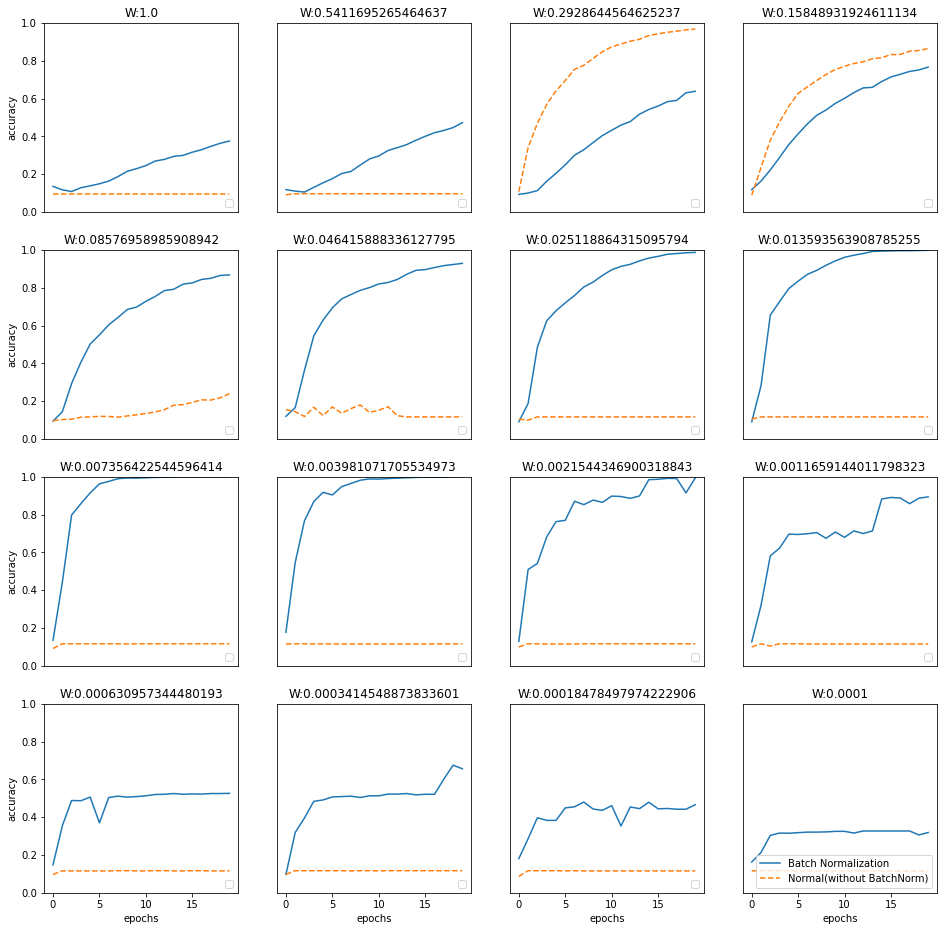

In [10]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
fig = plt.figure(figsize=(16,16))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()